
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [2]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a.

b.

c.

d.

e.

f.

g.

# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

Load Data

In [287]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and Normalize Data
df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df = df.fillna(0)

# Scale Data (0,1)
#df_scaled = pd.DataFrame(preprocessing.scale(df, axis=1), columns=df.columns)
X = df.drop(['Weight'], axis=1)
X = pd.DataFrame(preprocessing.scale(X, axis=1), columns=X.columns)
y = df['Weight']
#y = pd.DataFrame(preprocessing.scale(y), columns=['Weight'])


# Split Data into Testing and Training
X_train, X_test = train_test_split(X, test_size=0.25, random_state=50)
y_train, y_test = train_test_split(y, test_size=0.25, random_state=50)

1.

Lasso:

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

lasso = Lasso(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds)

lasso_regressor = GridSearchCV(lasso, tuned_parameters, cv=k_fold, refit=False, scoring = 'neg_mean_absolute_error')
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
#print(lasso_regressor.best_score_)


#k_fold = KFold(5)
#for k, (train, test) in enumerate(k_fold.split(X, y)):
#    lasso_regressor.fit(X.iloc[train], y.iloc[train])
#    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
#          format(k, lasso_regressor.best_params_['alpha'], lasso_regressor.best_score_)
#         )

{'alpha': 0.0466301673441609}


Ridge

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Ridge = Ridge(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds)

Ridge_regressor = GridSearchCV(Ridge, tuned_parameters, cv=k_fold, refit=False, scoring = 'neg_mean_absolute_error')
Ridge_regressor.fit(X_train, y_train)

print(Ridge_regressor.best_params_)
#(Ridge_regressor.best_score_)

#k_fold = KFold(5)
#for k, (train, test) in enumerate(k_fold.split(X, y)):
#    Ridge_regressor.fit(X.iloc[train], y.iloc[train])
#    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
#          format(k, Ridge_regressor.best_params_['alpha'], Ridge_regressor.best_score_)
#         )

{'alpha': 0.005}


2.

Lasso

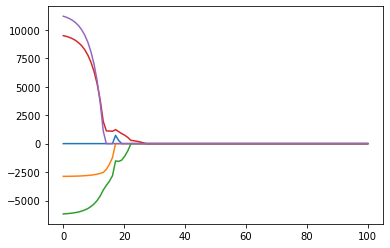

In [273]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


#alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(-2,10,100)*0.5

results = {}
length1_weights = []
length2_weights = []
length3_weights = []
height_weights = []
width_weights = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=50, max_iter=100000)
    lasso.fit(X_train, y_train)
    length1_weights.append(lasso.coef_[0])
    length2_weights.append(lasso.coef_[1])
    length3_weights.append(lasso.coef_[2])
    height_weights.append(lasso.coef_[3])
    width_weights.append(lasso.coef_[4])

alphas = np.linspace(0,len(length1_weights),len(length1_weights))
plt.plot(alphas, length1_weights)
plt.plot(alphas, length2_weights)
plt.plot(alphas, length3_weights)
plt.plot(alphas, height_weights)
plt.plot(alphas, width_weights)
plt.show()

As alpha increases in Lasso, the weights for the coefficients converge to 0. This reduced the chances of overfitting.

Ridge

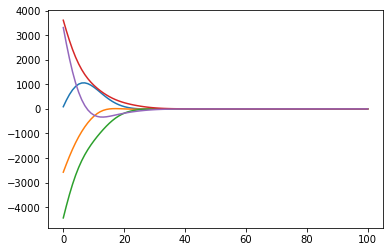

In [274]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


#alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(-2,10,100)*0.5

results = {}
length1_weights = []
length2_weights = []
length3_weights = []
height_weights = []
width_weights = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, random_state=50, max_iter=100000)
    ridge.fit(X_train, y_train)
    length1_weights.append(ridge.coef_[0])
    length2_weights.append(ridge.coef_[1])
    length3_weights.append(ridge.coef_[2])
    height_weights.append(ridge.coef_[3])
    width_weights.append(ridge.coef_[4])

alphas = np.linspace(0,len(length1_weights),len(length1_weights))
plt.plot(alphas, length1_weights)
plt.plot(alphas, length2_weights)
plt.plot(alphas, length3_weights)
plt.plot(alphas, height_weights)
plt.plot(alphas, width_weights)
plt.show()

As alpha increases in Ridge, the weights for the coefficients converge to 0. This reduced the chances of overfitting.

3.

Linear Regression

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_test_lr = lr.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lr))

306.26529661016946


Lasso

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds)

lasso_regressor = GridSearchCV(lasso, tuned_parameters, cv=k_fold, refit=False, scoring = 'neg_mean_absolute_error')
lasso_regressor.fit(X_train, y_train)

lasso = Lasso(alpha=lasso_regressor.best_params_['alpha'], random_state=50, max_iter=100000)
lasso.fit(X_train, y_train)
pred_test_lasso = lasso.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lasso))

306.1109759833363


Ridge

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=50, max_iter=100000)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
k_fold = KFold(n_folds)

Ridge_regressor = GridSearchCV(ridge, tuned_parameters, cv=k_fold, refit=False, scoring = 'neg_mean_absolute_error')
Ridge_regressor.fit(X_train, y_train)

ridge = Ridge(alpha=lasso_regressor.best_params_['alpha'], random_state=0, max_iter=100000)
ridge.fit(X_train, y_train)
pred_test_ridge = ridge.predict(X_test)
print(mean_absolute_error(y_test, pred_test_ridge))

311.3701888507714


4.

Lasso

In [278]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

n_folds = 10
k_fold = KFold(n_folds)

lasso_cv = LassoCV(alphas=None, cv=k_fold, max_iter=100000)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.alpha_)

lasso = Lasso(alpha=lasso_cv.alpha_, random_state=50, max_iter=100000)
lasso.fit(X_train, y_train)
pred_test_lasso = lasso.predict(X_test)
print(mean_absolute_error(y_test, pred_test_lasso))
print(lasso.coef_)

0.008669540538066943
306.28688652452695
[   -0.         -2869.01262507 -6133.72352006  9335.45583058
 10988.85489453]


5.

The penalty term for lasso penalizes adding parameters based on the absolute value of the magnitude of coefficients. Thus, if we don't scale and some feature has very large numbers (resulting in large coefficients) and another has small numbers (resulting in small coefficients) then lasso would be biased to dropping the large magnitutde features. By scaling first we eliminate this bias and avoid misleading results when using Lasso or Ridge.

Extra (I liked the example code so kept it for future reference)

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 352.74012, score: 0.64276
[fold 1] alpha: 352.74012, score: 0.85138
[fold 2] alpha: 466.30167, score: -0.41026
[fold 3] alpha: 352.74012, score: 0.64473
[fold 4] alpha: 0.00500, score: 0.67619

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


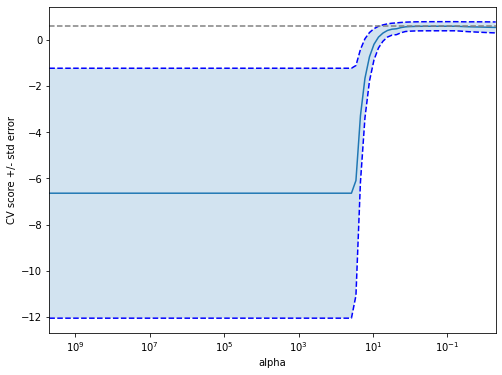

In [225]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]

df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']


lasso = Lasso(random_state=0, max_iter=100000, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=100000)
k_fold = KFold(5)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X.iloc[train], y.iloc[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X.iloc[test], y.iloc[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer